In [17]:
# Working with Real Data "California Housing Prices dataset" (https://www.kaggle.com/camnugent/california-housing-prices)

# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset into a dataframe
housing = pd.read_csv('housing.csv')

print(f"Housing's shape: {housing.shape}")
housing.head()

Housing's shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
# Checking the types of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
# Get categorical features
housing_categ = housing.select_dtypes(include=[object])
housing_categ.columns

Index(['ocean_proximity'], dtype='object')

In [20]:
# Get numerical features
housing_num = housing.select_dtypes(exclude=[object])
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [21]:
# Checking the missing values
missing = housing.isna().sum()
missing

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
# Get the descriptive statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [23]:
# Get the duplicate rows 
duplicated_rows = housing[housing.duplicated()]
duplicated_rows.shape

(0, 10)

In [24]:
# Find out the unique value of the selected column
ocean_proximity = housing['ocean_proximity'].unique()
ocean_proximity

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
# Get count of each category
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [26]:
# Check outliers
def outlier_detection(df, variable):
    
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
 
    #lower and upper limits
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr   
    print(f'Q1={q1:.3f}, Q3={q3:.3f}, IQR={iqr:.3f}, lower={lower:.3f}, upper={upper:.3f}')
  
    outliers = []
    for index, x in enumerate(df[variable]):
        if x <= lower or x >= upper:
            outliers.append(index)
    return outliers

outliers = outlier_detection(housing, 'longitude')
print("Nb_outliers_of_longitude = ", len(outliers))

Q1=-121.800, Q3=-118.010, IQR=3.790, lower=-127.485, upper=-112.325
Nb_outliers_of_longitude =  0


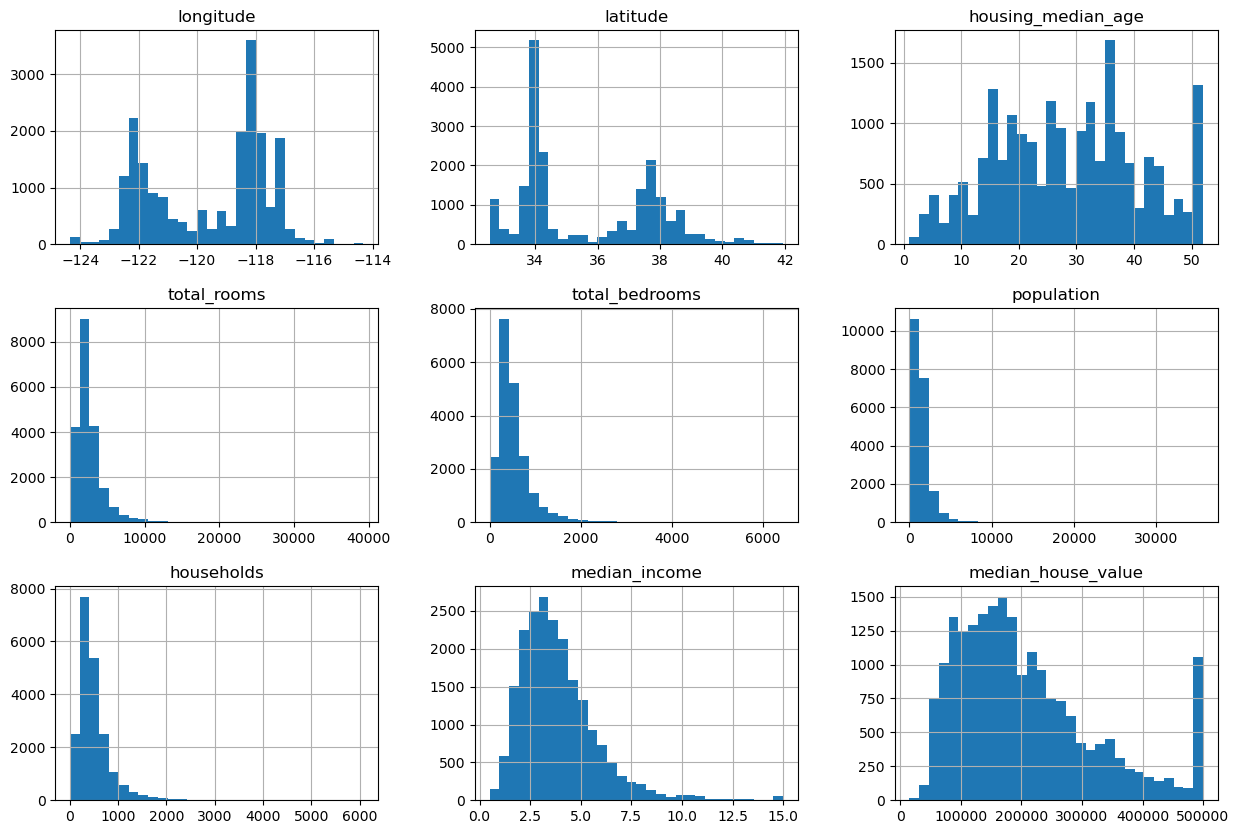

In [27]:
# visualization of numerical features histograms
housing.hist(bins=30, figsize=(15,10))
plt.show()

In [28]:
# Compute features skewness
housing[housing_num.columns].skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [29]:
# Compute features kurtosis
housing[housing_num.columns].kurtosis()

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64

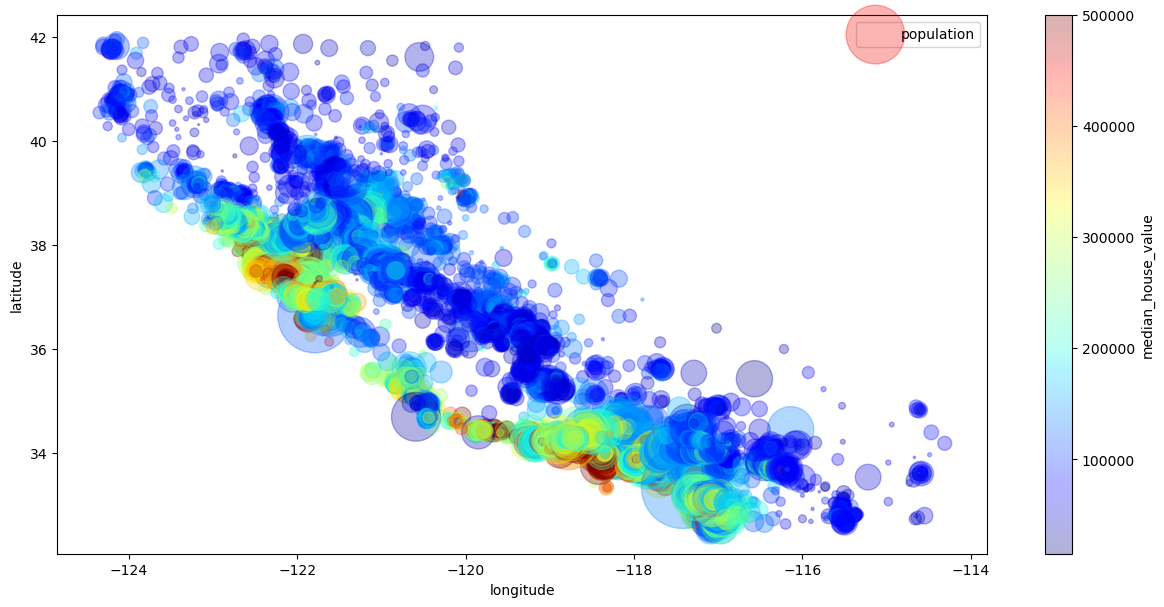

In [30]:
# Extract insights by visualization
# 'alpha' = density of points
# 's' = size of a point is propotional to 'population'
# 'c' = color of a point is propotional to 'median_house_value' (colormap = 'jet' : from blue to red)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/10., 
             label='population', figsize=(15, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

<Axes: >

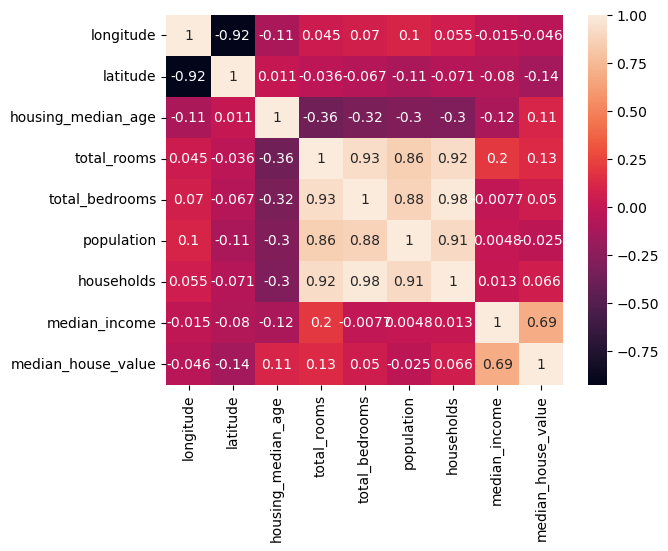

In [31]:
# Correlation between numerical features
corr_matrix = housing_num.corr()
sns.heatmap(corr_matrix, annot=True)

In [32]:
housing[['total_rooms','total_bedrooms', 'population', 'households']].corr()


,total_rooms,total_bedrooms,population,households
total_rooms,1.000000,0.930380,0.857126,0.918484
total_bedrooms,0.930380,1.000000,0.877747,0.979728
population,0.857126,0.877747,1.000000,0.907222
households,0.918484,0.979728,0.907222,1.000000


In [33]:
# Correlation of target variable 'median_house_value' with other variables
abs(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population            0.024650
longitude             0.045967
latitude              0.144160
Name: median_house_value, dtype: float64

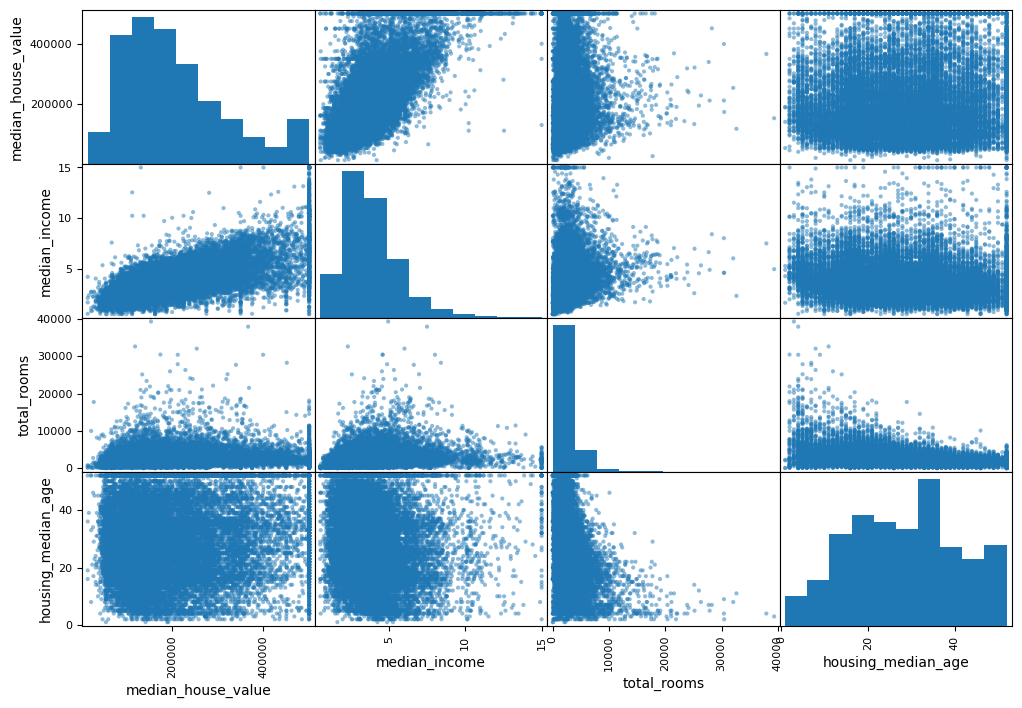

In [34]:
from pandas.plotting import scatter_matrix
# the 3 more correlated features to 'median_house_value'
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

# Data Preparation

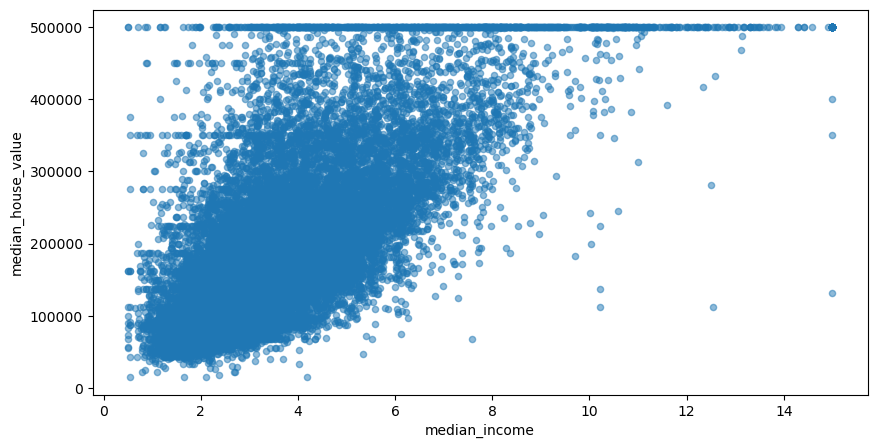

In [35]:
# ==> The most important feature for 'median_house_value' prediction is 'median_income'
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(10,5), alpha=0.5)
plt.show()

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

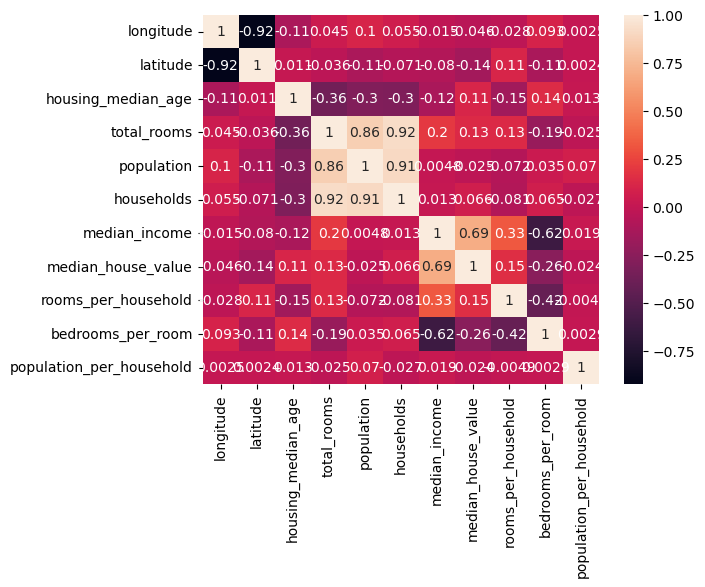

In [36]:
# Feature Engineering : feature combination
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# drop 'total_bedrooms' because it's highly correlated to households (corr = 0.98) : 
# ==> 'total_bedrooms' gives the same information as households
# corr('total_bedrooms','median_house_value') =  0.049686 < 
# corr('households','median_house_value') =  0.065843 ==> drop 'total_bedrooms' 
      
housing.drop(['total_bedrooms'], axis=1, inplace=True)

# check the correlation 
corr_matrix = housing.select_dtypes(exclude=[object]).corr()
# Correlation between numerical variables : a symmetric 10x10 matrix
sns.heatmap(corr_matrix, annot=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

In [46]:
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1) # input variables (X is dataframe)
y = housing["median_house_value"].to_numpy() # output variable (y is an array)

# `stratify` makes a split with the same proportion of y in training and testing sets
bins = np.linspace(y.min(), y.max(), 100)
y_binned = np.digitize(y, bins)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True, stratify=y_binned,random_state=22)

In [56]:
# Biuild a pre-processing pipeline that (1) imputes missing values, transforms distributions and scales numerical variables 
# (2) encode categorical variables

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# Print numerical features
num_features = X_train.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = X_train.select_dtypes(include=[object]).columns
print(cat_features)

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), 
                         ("transformer", PowerTransformer(method='yeo-johnson', standardize=True))])

# full_pipeline applies num_pipeline on numerical variables and encodes categorical variables
full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


In [57]:
# Fit the full_pipeline to the training data
full_pipeline.fit(X_train)

# Apply full_pipeline on training and testing sets
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

print("\n X_train:", X_train.shape, "X_test:", X_test.shape)


 X_train: (16512, 15) X_test: (4128, 15)


In [59]:
# save the prepared training dataset into a dataframe then a csv file

features = num_features.to_numpy()
# columns names of the dataframe
features = np.concatenate((features, ['ocean_1', 'ocean_2', 'ocean_3', 'ocean_4', 'ocean_5', 'median_house_value']), axis=0)
print(features)

df_train = pd.DataFrame(np.concatenate((X_train, y_train[:, np.newaxis]), axis=1), columns=features)
df_train.to_csv('housing_train.csv', index=False)
df_train.head()

['longitude' 'latitude' 'housing_median_age' 'total_rooms' 'population'
 'households' 'median_income' 'rooms_per_household' 'bedrooms_per_room'
 'population_per_household' 'ocean_1' 'ocean_2' 'ocean_3' 'ocean_4'
 'ocean_5' 'median_house_value']


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-1.498801e-15,0.872078,-0.821368,1.060025,0.762658,1.810501,0.078757,-1.545452,1.586059,-2.511716,1.0,0.0,0.0,0.0,0.0,240000.0
1,-1.471046e-15,0.861019,-0.652535,1.449561,1.413273,1.505998,0.637755,0.033086,-0.145523,-0.097845,1.0,0.0,0.0,0.0,0.0,250000.0
2,2.053913e-15,-1.372369,0.606412,-1.014326,-1.572720,-1.511673,-0.326826,1.523596,0.446924,-0.226179,0.0,1.0,0.0,0.0,0.0,134400.0
3,-1.526557e-15,0.890389,-0.243525,0.579703,0.367230,0.547590,0.833675,0.152906,-0.305407,-0.401924,1.0,0.0,0.0,0.0,0.0,287600.0
4,-2.220446e-16,0.660449,1.407146,-0.671688,-0.045275,-0.356063,-1.907712,-0.961195,1.693039,0.889069,0.0,1.0,0.0,0.0,0.0,49600.0


In [60]:
df_test = pd.DataFrame(np.concatenate((X_test, y_test[:, np.newaxis]), axis=1), columns=features)
df_test.to_csv('housing_test.csv', index=False)
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-1.942890e-16,0.684476,-0.736535,-0.482003,-0.302538,-0.120648,-1.726609,-1.045459,1.449302,-0.489332,0.0,1.0,0.0,0.0,0.0,47500.0
1,-1.665335e-16,-0.488562,-0.084404,0.830653,0.568589,0.908369,0.315645,-0.080220,0.010225,-0.783875,0.0,0.0,0.0,0.0,1.0,395100.0
2,-1.110223e-16,0.502597,0.755156,0.543519,0.211104,0.368740,-0.421444,0.490798,-0.537571,-0.359413,0.0,1.0,0.0,0.0,0.0,85500.0
3,-1.471046e-15,0.890389,1.758741,0.023673,0.003336,0.354319,-0.410195,-0.835306,0.926268,-0.921908,1.0,0.0,0.0,0.0,0.0,209500.0
4,6.938894e-16,-0.756130,-0.993752,-3.363676,-3.809716,-3.937836,1.732079,3.803370,-3.332458,1.515489,1.0,0.0,0.0,0.0,0.0,500001.0


In [61]:
# To maximise reproducibility, we‘d like to use this pipeline repeatedly for our new incoming data. 
# Let’s save the pipeline by using ‘joblib’ package to save it as a pickle file.
import joblib
joblib.dump(full_pipeline, 'full_pipeline.pkl')

# Now we can call this pipeline, which includes all sorts of data preprocessing we need.
loaded_pipeline = joblib.load('full_pipeline.pkl')
print(loaded_pipeline)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['ocean_proximity'], dtype='object'))])
